#### Import Required Libraries

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Visualisation
import numpy as np
import pandas as pd
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import keras
from keras import backend as K
from sklearn.model_selection import train_test_split

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

Using TensorFlow backend.


In [4]:
import tensorflow
tensorflow.version.VERSION

'2.0.0'

In [2]:
#Loading and splitting data into test and train
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
df = train.copy()
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
print(df.shape , test.shape)

(42000, 785) (28000, 784)


In [4]:
df.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [5]:
y = df.label.values.astype('int32')
df = df[df.columns[1:]].values.astype('float32')

X_train , X_test , y_train , y_test = train_test_split(df , y , test_size = 0.2 , random_state = 100)

In [6]:
print ( X_train.shape , y_train.shape)

(33600, 784) (33600,)


In [7]:
test = test.values.astype('float32')

In [8]:
X_train = X_train.reshape( -1 , 28 , 28 , 1)
X_test = X_test.reshape( -1 , 28 , 28 , 1)
test = test.reshape( -1 , 28 , 28 , 1)

In [9]:
X_train.shape

(33600, 28, 28, 1)

In [10]:
new = pd.read_csv(r'train.csv')
#new = new.iloc[:,1:]

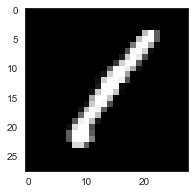

In [11]:
plt.figure(figsize = [3, 3])
plt.imshow(new.values[0][1:].reshape(28,28), cmap='gray')

In [12]:
new.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [13]:
label_counter = new.label.value_counts()
print (label_counter)

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64


In [14]:
X_train = X_train / 255
X_test = X_test / 255
test = test / 255

In [15]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [16]:
#CNN Model
img_rows, img_cols = 28, 28
input_shape = (1, img_rows, img_cols)
def baseline_model():
    #Model Creation
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same',input_shape=(28 , 28 , 1)))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    #Model Compilation
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])    
    return model
# Model Build
model = baseline_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)         

In [17]:
model.compile(optimizer = RMSprop(lr=0.001),loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
batch_size = 64
epochs = 10
lr_reduce = ReduceLROnPlateau(monitor='val_acc', factor=0.1, epsilon=0.0001, patience=1, verbose=1)

In [19]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.0, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [20]:
hist = model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
                    steps_per_epoch=X_train.shape[0] // batch_size,
                    callbacks=[lr_reduce],
                    validation_data=(X_test, y_test),
                    epochs = epochs, verbose = 2)

Epoch 1/10
 - 49s - loss: 0.2648 - accuracy: 0.9188 - val_loss: 0.1166 - val_accuracy: 0.9677
Epoch 2/10
 - 49s - loss: 0.0941 - accuracy: 0.9709 - val_loss: 0.0583 - val_accuracy: 0.9807
Epoch 3/10
 - 49s - loss: 0.0740 - accuracy: 0.9770 - val_loss: 0.0618 - val_accuracy: 0.9812
Epoch 4/10
 - 50s - loss: 0.0604 - accuracy: 0.9810 - val_loss: 0.0410 - val_accuracy: 0.9876
Epoch 5/10
 - 50s - loss: 0.0565 - accuracy: 0.9824 - val_loss: 0.0442 - val_accuracy: 0.9890
Epoch 6/10
 - 50s - loss: 0.0524 - accuracy: 0.9834 - val_loss: 0.0365 - val_accuracy: 0.9896
Epoch 7/10
 - 50s - loss: 0.0496 - accuracy: 0.9854 - val_loss: 0.0375 - val_accuracy: 0.9893
Epoch 8/10
 - 51s - loss: 0.0458 - accuracy: 0.9863 - val_loss: 0.0295 - val_accuracy: 0.9919
Epoch 9/10
 - 50s - loss: 0.0413 - accuracy: 0.9875 - val_loss: 0.0295 - val_accuracy: 0.9917
Epoch 10/10
 - 51s - loss: 0.0416 - accuracy: 0.9868 - val_loss: 0.0281 - val_accuracy: 0.9911


In [21]:
score = model.evaluate(X_test, y_test, verbose=0)
print('valid loss:', score[0])
print('valid accuracy:', score[1])

valid loss: 0.028149058838980202
valid accuracy: 0.9910714030265808


In [22]:
pred = model.predict(test)

In [23]:
pred

array([[5.5533609e-09, 2.8394214e-09, 9.9999905e-01, ..., 3.9781759e-07,
        3.0253414e-08, 1.2472681e-08],
       [9.9999762e-01, 9.1225627e-10, 1.3484724e-08, ..., 1.1568327e-09,
        2.0380004e-07, 3.3478042e-08],
       [3.4588115e-08, 6.4482253e-10, 1.2212758e-08, ..., 4.2106883e-08,
        2.1657978e-07, 9.9999857e-01],
       ...,
       [6.9031764e-12, 6.4779772e-11, 1.6263191e-10, ..., 1.8154185e-10,
        8.0356068e-09, 1.3878664e-09],
       [1.7395041e-05, 9.4159596e-08, 4.7769172e-06, ..., 3.2561351e-05,
        9.4140972e-07, 9.9989462e-01],
       [1.6221304e-09, 6.6064487e-10, 9.9999750e-01, ..., 2.9781491e-08,
        2.3611080e-06, 1.0986843e-08]], dtype=float32)

In [24]:
pred_digits = np.argmax(pred , axis = 1)
ImageId = range( 1 , len(pred_digits)+1 )

In [25]:
pred_digits

array([2, 0, 9, ..., 3, 9, 2])

In [26]:
context = {"ImageId" : ImageId , "Label" : pred_digits }
ans = pd.DataFrame(context)

In [27]:
ans.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [28]:
ans.to_csv('submission.csv',index=None)

#### Scatterplot on 2 principal components of MNIST dataset

In [29]:
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('train.csv')
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(42000, 785)


In [30]:
#find the co-variance matrix which is : A^T * A
sample_data = standardized_data
# matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T , sample_data)
print ('The shape of variance matrix = ', covar_matrix.shape)

The shape of variance matrix =  (785, 785)


In [31]:
from scipy.linalg import eigh
values, vectors = eigh(covar_matrix, eigvals=(782,783))
print('Shape of eigen vectors = ',vectors.shape)
vectors = vectors.T
print('Updated shape of eigen vectors = ',vectors.shape)

Shape of eigen vectors =  (785, 2)
Updated shape of eigen vectors =  (2, 785)


In [32]:
import matplotlib.pyplot as plt
new_coordinates = np.matmul(vectors, sample_data.T)

In [33]:
labels = data['label']
new_coordinates = np.vstack((new_coordinates, labels)).T
dataframe = pd.DataFrame(data=new_coordinates, columns=('1st_principal', '2nd_principal', 'label'))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -3.834079       5.498016    1.0
1      -1.533175      -6.018994    0.0
2      -2.425707       1.959875    1.0
3      -2.284497      -5.716447    4.0
4      -1.153826      -6.049490    0.0


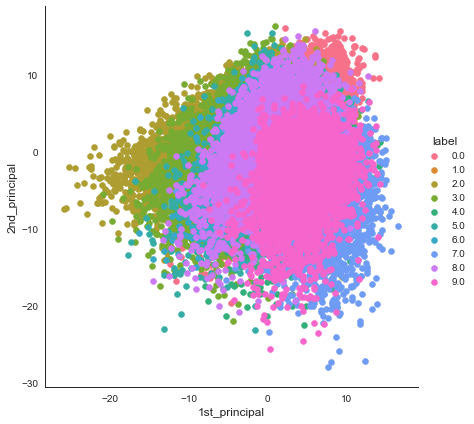

In [34]:
import seaborn as sn
sn.FacetGrid(dataframe, hue='label', size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

### References:
- https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/
- https://github.com/deadskull7/MNIST-digit-recognition-and-classification-using-CNN-with-Keras-99.70/blob/master/MNIST%20digit%20recognition%20%5B0.9932%5D.ipynb
- https://medium.com/analytics-vidhya/principal-component-analysis-pca-with-code-on-mnist-dataset-da7de0d07c22
- https://python-graph-gallery.com/scatter-plot/